## Outline

- Introduction to Pandas
- Loading installed packages
- Inspect data
- Explore plot types
- Data Selection and Filtering
- Data Manipulation
- Summary of Functions

## Introduction to Pandas

Pandas is a powerful data manipulation library in Python. It provides data structures and functions that make working with structured data more convenient and efficient compared to base Python.




Pandas introduces two primary data structures: **Series** and **DataFrames**.
- A Series is a one-dimensional labeled array that can hold any data type (as long as all the elements are the same data type).
- A DataFrame is a two-dimensional labeled data structure with columns of potentially different types. It is similar to a spreadsheet or a SQL table.

Pandas provides a wide range of functions and methods for data manipulation, cleaning, filtering, aggregation, merging, and more. It integrates well with other libraries in the data science ecosystem, such as NumPy for numerical computing and Matplotlib for data visualization.

Some key advantages of using Pandas over base Python include:
- Efficient memory usage and performance for large datasets
- Intuitive and expressive syntax for data manipulation
- Built-in functions for common data operations (e.g., filtering, grouping, reshaping)
- Seamless integration with other data science libraries
- Handling of missing data and data alignment
- Powerful tools for data exploration and analysis

Throughout this lab, we will explore various aspects of Pandas and its capabilities for data manipulation, visualization and analysis.

## Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib



In [ ]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import statsmodels.api as sm


## Getting data into Pandas

In this case we will load data from the statsmodels.org library. `mtcars` is a common practice dataset.


In [ ]:
mtcars = sm.datasets.get_rdataset("mtcars", "datasets", cache=True).data

# Define dataset as a dataframe
df = pd.DataFrame(mtcars)

# Display
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


from matplotlib import pyplot as plt
df['mpg'].plot(kind='hist', bins=20, title='mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['cyl'].plot(kind='hist', bins=20, title='cyl')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['disp'].plot(kind='hist', bins=20, title='disp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['hp'].plot(kind='hist', bins=20, title='hp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='mpg', y='cyl', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cyl', y='disp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='disp', y='hp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='hp', y='drat', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['mpg'].plot(kind='line', figsize=(8, 4), title='mpg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['cyl'].plot(kind='line', figsize=(8, 4), title='cyl')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['disp'].plot(kind='line', figsize=(8, 4), title='disp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['hp'].plot(kind='line', figsize=(8, 4), title='hp')
plt.gca().spines[['top', 'right']].set_visible(False)

## Preview Data

Use the following data dictionary to understand the attributes available

|Attribute | Description |
|---------|-----------|
|  mpg    |Miles/(US) gallon|
|  cyl    |Number of cylinders|
|  disp   |Displacement (cu.in.)|
|hp   |Gross horsepower|
|drat |Rear axle ratio|
|wt   |Weight (1000 lbs)|
|qsec |1/4 mile time|
|vs   |Engine (0 = V-shaped, 1 = straight)|
|am   |Transmission (0 = automatic, 1 = manual)|
|gear |Number of forward gears|


In [ ]:
#look at the top rows
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [ ]:
#look at last rows
df.tail(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [ ]:
#get a summary of the dataset
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


### Your Turn: Summarizing data with Pandas

1. Download insurance data.  (I think Matt P showed you this dataset.)

In [ ]:
idf = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/insurance.csv")


2. Display top and bottom rows of  `idf`.
3. What is the average of expenses?
4. What is the median age?

In [ ]:
# Your code goes here


In [ ]:
# Your code goes here


In [ ]:
# Your code goes here


# Create basic charts with `mtcars`

- Line chart
- Bar chart
- Histogram
- Box plot
- Scatter plot


<Axes: xlabel='rownames'>

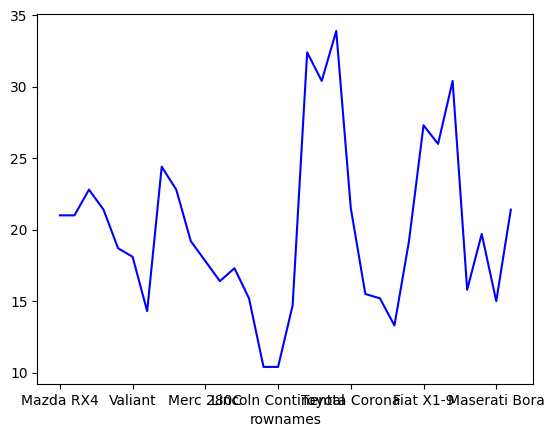

In [ ]:
#Line chart
df['mpg'].plot.line(color='blue')

<Axes: ylabel='rownames'>

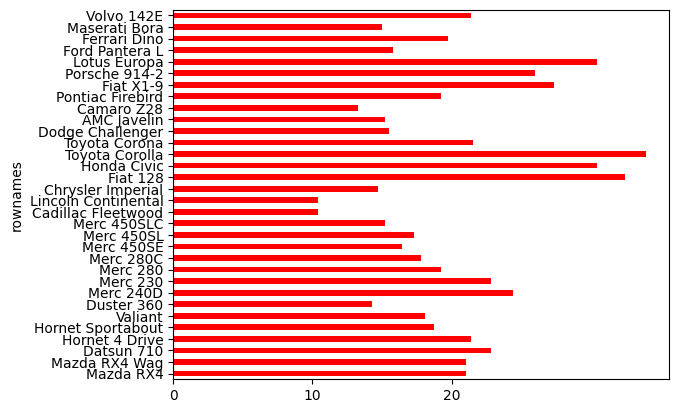

In [ ]:
#Line chart
df['mpg'].plot.barh(color='red', xticks=[0,10,20])

<Axes: title={'center': 'Miles Per Gallon'}, ylabel='Frequency'>

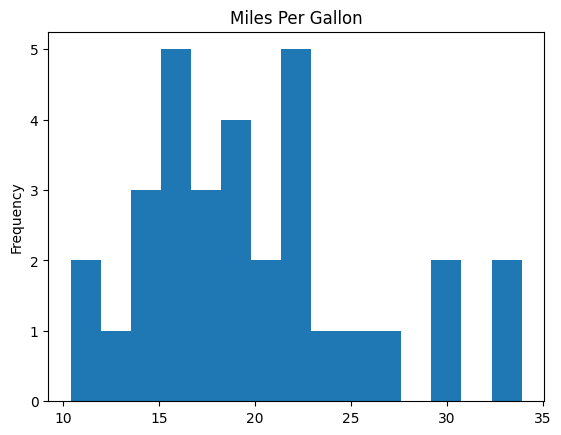

In [ ]:
#Histogram
df['mpg'].plot.hist(bins=15,title='Miles Per Gallon')

<Axes: >

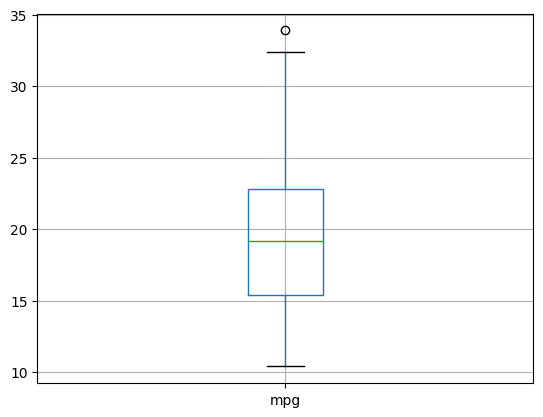

In [ ]:
 # Boxplot
 df.boxplot(column = "mpg")

<Axes: title={'center': 'mpg'}, xlabel='cyl'>

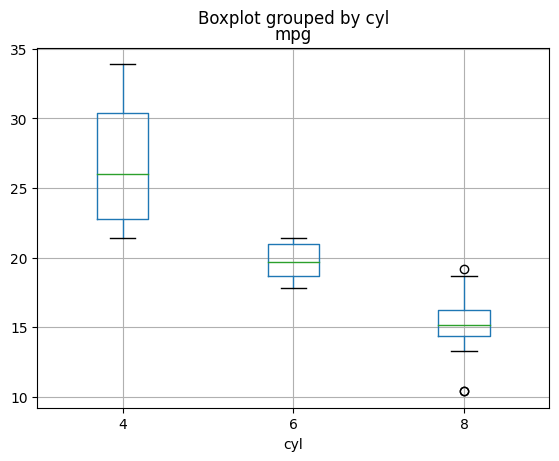

In [ ]:
# Boxplot showitn distribution of mpg at levels of cyl
df.boxplot(column = "mpg", by = "cyl")

<Axes: xlabel='mpg', ylabel='hp'>

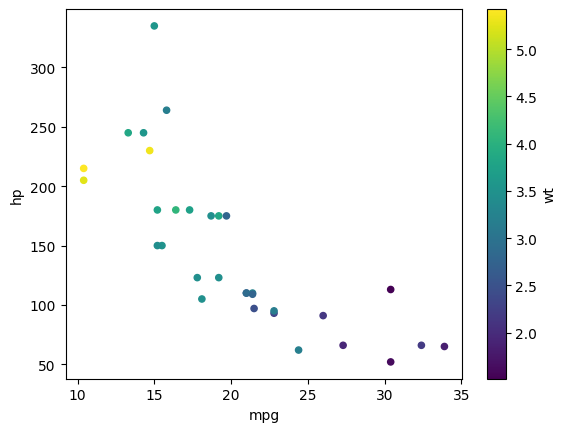

In [ ]:
#Scatter plot
df.plot.scatter(x = 'mpg',y = 'hp',c = 'wt')

### Your Turn: Visualizing Relationships

- Using the `idf` dataset, make a plot showing the distribution of `bmi` by `sex`:

In [ ]:
# Your code goes here


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Selection and Filtering

Data selection and filtering are essential techniques for working with Pandas DataFrames. They allow you to extract specific subsets of data based on certain conditions.

### Selecting Specific Columns

To select specific columns from a DataFrame, you can use square brackets `[]` and pass in a list of column names.


In [ ]:
# Selecting specific columns
df[['mpg', 'cyl']].head()

Square bracket subsetting, or indexing, is a way to access specific rows and columns of a DataFrame. When you use square brackets `[]` with a DataFrame, you can pass in:
- A single column name to select a single column (returns a Series)
- A list of column names to select multiple columns (returns a DataFrame)
- A *boolean mask* to select rows based on a condition
- A slice to select a range of rows

For example, `df['mpg']` selects the 'mpg' column as a Series, while `df[['mpg', 'cyl']]` selects the 'mpg' and 'cyl' columns as a DataFrame.

### Filtering Rows with Boolean Masks

Boolean masking is a powerful technique for filtering rows based on certain conditions. You create a boolean mask by applying a condition to a DataFrame, which returns a series of True/False values. You can then use this mask to select the rows where the condition is True.


In [ ]:
# Filtering rows based on conditions
high_mpg = df[df['mpg'] > 25]
high_mpg

In this example, `df['mpg'] > 25` creates a boolean mask where True values indicate rows with 'mpg' greater than 25. This mask is then used to select the corresponding rows from the DataFrame.

### Using loc and iloc for Indexing

Pandas provides two main methods for indexing and selecting data from a DataFrame: `loc` and `iloc`.

- `loc` is primarily label-based, meaning it uses the row and column labels to select data. It includes the last element in the selection.
- `iloc` is integer-based, meaning it uses integer positions to select data. It does not include the last element in the selection.


In [ ]:
# Using loc and iloc for indexing
df.loc[ :, ['mpg', 'hp']]
df.iloc[ 0:5 , [0, 3]]

In the first example, `df.loc[:, ['mpg', 'hp']]` selects all rows (that's what the ":" means) and columns 'mpg' and 'hp'.

In the second example, `df.iloc[0:5, [0, 3]]` selects rows with integer positions 0 to 4 (exclusive) and columns with integer positions 0 and 3.

The dot notation `df.` is used to access attributes and methods of a DataFrame. For example:
- `df.head()` calls the `head()` method to display the first few rows of the DataFrame.
- `df.info()` calls the `info()` method to get a concise summary of the DataFrame.
- `df.describe()` calls the `describe()` method to generate descriptive statistics of the DataFrame.

These methods are built-in functions provided by Pandas to perform specific operations on the DataFrame.

## Data Manipulation

Data manipulation involves modifying and transforming the data within a DataFrame. Pandas provides various functions and methods for data manipulation tasks.

### Creating New Columns

You can create new columns in a DataFrame by assigning values to a new column name. The values can be based on existing columns or derived from calculations.


In [ ]:
# Creating new columns based on existing columns
df['mpg_per_cyl'] = df['mpg'] / df['cyl']
df[['mpg', 'cyl', 'mpg_per_cyl']].head()

In this example, a new column 'mpg_per_cyl' is created by dividing the values of 'mpg' by 'cyl'.

### Renaming Columns

To rename columns in a DataFrame, you can use the `rename()` function and provide a dictionary mapping the old column names to the new column names.


In [ ]:
# Renaming columns
df = df.rename(columns={'mpg': 'miles_per_gallon'})
df.columns

Here, the column 'mpg' is renamed to 'miles_per_gallon' using the `rename()` function.

### Handling Missing Values

Pandas provides functions to handle missing values in a DataFrame. You can check for missing values using `isnull()` and fill or drop them using `fillna()` or `dropna()`, respectively.


In [ ]:
# Handling missing values
df.isnull().sum()
df_fillna = df.fillna(0)
df_fillna.isnull().sum()

In this example, `isnull().sum()` is used to count the number of missing values in each column. Then, `fillna(0)` is used to fill all missing values with 0.

These are just a few examples of data selection, filtering, and manipulation techniques in Pandas. Pandas provides many more functions and methods for advanced data manipulation tasks.

## Your Turn: Create an Additional Chart

➡️ Assignment Tasks
- Create a pie chart showing the count of cars by transmission type


In [ ]:
#Your code goes here

## Summary of Functions

Throughout this lab, we introduced several functions and methods provided by Pandas. Here's a summary of the key functions covered:

- `pd.DataFrame()`: Creates a DataFrame from a dictionary or other data source
- `df.head()`: Displays the first few rows of a DataFrame
- `df.tail()`: Displays the last few rows of a DataFrame
- `df.info()`: Provides a concise summary of a DataFrame
- `df.describe()`: Generates descriptive statistics of a DataFrame
- `df.plot.line()`: Creates a line chart
- `df.plot.barh()`: Creates a horizontal bar chart
- `df.plot.hist()`: Creates a histogram
- `df.plot.box()`: Creates a box plot
- `df.plot.scatter()`: Creates a scatter plot
- `df.loc[]`: Selects data based on labels
- `df.iloc[]`: Selects data based on integer positions
- `df.rename()`: Renames columns of a DataFrame
- `df.isnull()`: Checks for missing values in a DataFrame
- `df.fillna()`: Fills missing values in a DataFrame
- `df.dropna()`: Drops rows or columns with missing values

These functions provide a solid foundation for working with Pandas DataFrames and performing various data manipulation and visualization tasks. As you progress further, you'll encounter more advanced functions and techniques to handle complex data analysis scenarios.